In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. ODE Algorithms and Error Estimates
Consider the equation

$$\frac{dy}{dx} = -xy$$

with initial condition y(0) = 1, which has the exact solution $$y= \exp(-x^2/2)$$
Study the numerical integration
of this using the following methods:\
a) Euler Method\
b) Runge-Kutta 2nd Order\
c) Runge-Kutta 4th Order\
In particular, verify that the errors (difference between numerical and exact solutions) decrease according to
the expected power of the algorithm and discuss the difference between local error and global error.

In [12]:
#defining exact solution
def sol_ana(y, x): # exact solution
  return np.exp(-0.5*x**2)
  

In [13]:

def fxy(y, x):#Right hand side 
  return (-x*y)

5.159859017030569e-05 3.180351452519503e-08 6.797861358508452e-05


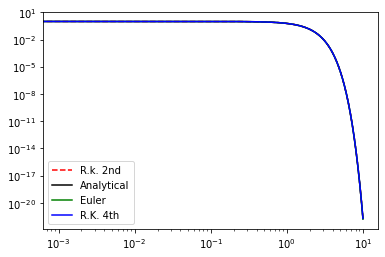

In [14]:
x0 = 0.0
xm = 10.0
N = 10000 # No. of points which divides x0 to xm on no. line
xv = np.linspace(x0,xm,N) 
h = xv[1]-xv[0] 

y_num = np.zeros(N) # assigning for RK 2nd order
y_num[0] = 1.0

y_eul = np.zeros(N)
y_eul[0] = 1.0 

y_R_K_4 = np.zeros(N)
y_R_K_4[0] = 1.0


#Runge kutta 2nd order
for i in range(1,N):
  k_1 = h*fxy(y_num[i-1],xv[i-1])
  k_2 = h*fxy(y_num[i-1]+k_1,xv[i-1]+h)
  y_num[i] = y_num[i-1] + 0.5*(k_1 + k_2)

# Euler method
  y_eul[i] = y_eul[i-1] + h*fxy(y_eul[i-1],xv[i-1])

#Runge kutta 4th order

  k_1 = h*fxy(y_R_K_4[i-1],xv[i-1])
  k_2 = h*fxy(y_R_K_4[i-1]+0.5*k_1,xv[i-1]+0.5*h)
  k_3 = h*fxy(y_R_K_4[i-1]+0.5*k_2,xv[i-1]+0.5*h)
  k_4 = h*fxy(y_R_K_4[i-1]+k_3,xv[i-1]+h)
  y_R_K_4[i] = y_R_K_4[i-1] + 0.1666*(k_1+2*k_2+2*k_3+k_4)

y_ana = sol_ana(0.0, xv)
error_euler = ((np.sum((y_ana - y_eul)**2))/N)**(1/2)
error_rk2 = ((np.sum((y_ana - y_num)**2))/N)**(1/2)
error_rk4 = ((np.sum((y_ana - y_R_K_4)**2))/N)**(1/2)
print(error_rk4,error_rk2,error_euler)

 
# plotting x vs y
plt.plot(xv, y_num, 'r--',label="R.k. 2nd")
plt.plot(xv, y_ana, 'k',label="Analytical")
plt.plot(xv,y_eul,'g',label="Euler")
plt.plot(xv,y_R_K_4,'b',label="R.K. 4th")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

/tmp/ipykernel_27551/1162332162.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  error_rk4[i] = ((np.sum((y_ana - y_R_K_4[i])**2))/i)**(1/2)
/tmp/ipykernel_27551/1162332162.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  error_euler[i] = ((np.sum((y_ana - y_eul[i])**2))/i)**(1/2)
/tmp/ipykernel_27551/1162332162.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  error_rk2[i] = ((np.sum((y_ana - y_num[i])**2))/i)**(1/2)


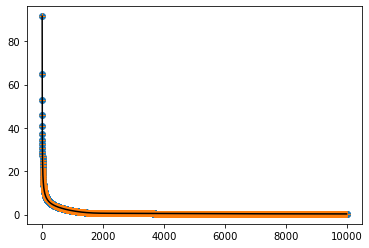

In [15]:
z = np.arange(N)


error_euler, error_rk2, error_rk4  = np.zeros(N),np.zeros(N),np.zeros(N)
for i in range(N):
    
#     k_1 = h*fxy(y_R_K_4[i-1],xv[i-1])
#     k_2 = h*fxy(y_R_K_4[i-1]+0.5*k_1,xv[i-1]+0.5*h)
#     k_3 = h*fxy(y_R_K_4[i-1]+0.5*k_2,xv[i-1]+0.5*h)
#     k_4 = h*fxy(y_R_K_4[i-1]+k_3,xv[i-1]+h)
    #y_R_K_4[i] = y_R_K_4[i-1] + 0.1666*(k_1+2*k_2+2*k_3+k_4)
    error_rk4[i] = ((np.sum((y_ana - y_R_K_4[i])**2))/i)**(1/2)
    error_euler[i] = ((np.sum((y_ana - y_eul[i])**2))/i)**(1/2)
    error_rk2[i] = ((np.sum((y_ana - y_num[i])**2))/i)**(1/2)

plt.plot(z,error_rk4,'o')
plt.plot(z,error_euler,'+')
plt.plot(z,error_rk2,'k')

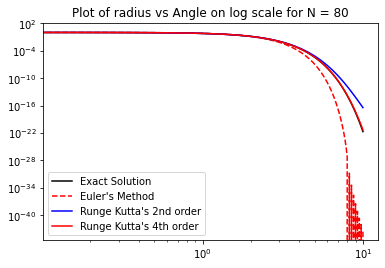

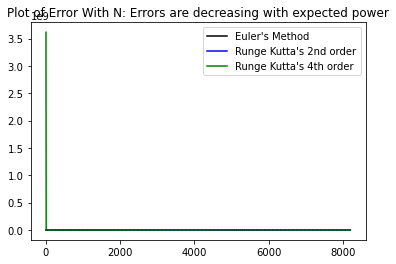

In [24]:
#importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt

#Defining Value of x and it's range
x_0 = 0
x_m = 10.0

#Enter Value of k to run the loop till N = 2^k 
k = 13

# Exact Solution
def y_exact(x):
  return np.exp((-x**2)/2)

#defining the function dx/dy = -xy
def fxy(x, y):
  return -x*y
#------------------------------------------
#Creating Array to store value of y for All different type of Methods


error_euler = np.zeros(k)
error_Runge_kutta_2nd = np.zeros(k)
error_Runge_kutta_4th = np.zeros(k)

n = np.logspace(3, k, k, endpoint=True, base=2)

for j in range(k):

  N = int(n[j])
  xv = np.linspace(x_0, x_m, N)
  h = xv[1] - xv[0]

  #------------------------------------------
 
  y_ana=np.exp((-xv**2)/2)


  y_euler = np.zeros(N)
  y_euler[0] = 1.0 

  y_Runge_kutta_2nd = np.zeros(N)
  y_Runge_kutta_2nd[0] = 1.0

  y_Runge_kutta_4th = np.zeros(N)
  y_Runge_kutta_4th[0] = 1.0
  #------------------------------------------

  for i in range(1, N):
    #for Euler Method
    y_euler[i] = y_euler[i-1] + h*fxy(y_euler[i-1], xv[i-1])

    #For Runge-Kutta 2nd Order
    k_1 = h*fxy(y_Runge_kutta_2nd[i-1], xv[i-1])
    k_2 = h*fxy(y_Runge_kutta_2nd[i-1]+ k_1, xv[i-1]+ h)
    y_Runge_kutta_2nd[i] = y_Runge_kutta_2nd[i-1] + (k_2 + k_1)/2

    #For Runge-Kutta 4th Order
    c_1 = h*fxy(y_Runge_kutta_4th[i-1], xv[i-1])
    c_2 = h*fxy(y_Runge_kutta_4th[i-1]+ c_1/2, xv[i-1]+ h/2)
    c_3 = h*fxy(y_Runge_kutta_4th[i-1]+ c_2/2, xv[i-1]+ h/2)
    c_4 = h*fxy(y_Runge_kutta_4th[i-1]+ c_3, xv[i-1]+ h)
    y_Runge_kutta_4th[i] = y_Runge_kutta_4th[i-1]+ 1/6*(c_1 + 2*c_2 + 2*c_3 + c_4)



  error_euler[j] = ((np.sum(abs(y_ana - y_euler)))/N)
  error_Runge_kutta_2nd[j] = ((np.sum(abs(y_ana - y_Runge_kutta_2nd)))/N)
  error_Runge_kutta_4th[j] = ((np.sum(abs(y_ana - y_Runge_kutta_4th)))/N)


  if N == 80:
    

    plt.plot(xv, y_exact(xv), 'k', label ='Exact Solution')
    plt.plot(xv, y_euler, 'r--', label ='Euler\'s Method')
    plt.plot(xv, y_Runge_kutta_2nd, 'b', label ='Runge Kutta\'s 2nd order')
    plt.plot(xv, y_Runge_kutta_4th, 'r', label ='Runge Kutta\'s 4th order')
    plt.title("Plot of radius vs Angle on log scale for N = 80")
    # Uncomment the Required Scale
    plt.xscale('log')
    plt.yscale('log')
    # plt.xscale('linear')
    # plt.yscale('linear')

    plt.legend()
    plt.show()



plt.plot(n, error_euler,"k", label ='Euler\'s Method')
plt.plot(n, error_Runge_kutta_2nd,"b", label ='Runge Kutta\'s 2nd order')
plt.plot(n, error_Runge_kutta_4th,"g", label ='Runge Kutta\'s 4th order')
plt.plot(n, n**(-1),"k:")
plt.plot(n, n**(-2),"b:")
plt.plot(n, n**(-4),"g:")
plt.title("Plot of Error With N: Errors are decreasing with expected power")
# plt.xscale('log')
# plt.xlabel('log')
# plt.ylabel('log')
# plt.yscale('log')
plt.legend()
plt.show()

## 2.Stellar Orbits in Kepler Potential
The equation that governs the motion of a star in r-θ plane under a Kepler potential is given by

$$\frac{d^2u}{d\theta^2} + u = \frac{1}{a(1-e^2)}$$

where u = 1/r, a and e are constants. \
Solve the above equation using values a = 5.0 and e = 0.8, plot the trajectory of the star with\
a) Euler Method\
b) Runge Kutta 2nd Order Method \
Is the motion of the star what you expect i.e., a closed ellipse with
eccentricity e and semi-major axis a ?
ustify the choices of initial conditions taken and any deviation from
the expected orbit.



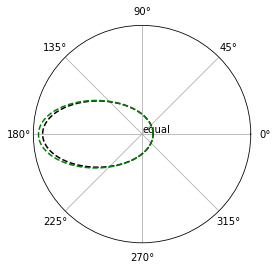

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

theta_0 = 0
theta_m = 2*np.pi
N = 1000

theta = np.linspace(theta_0,theta_m,N) 
e = 0.8 # eccentricity
a = 5.0

h = theta[1] - theta[0]

u_num = np.zeros(N) #Intializing for Euler method
u_num[0] = 1.0

v_num = np.zeros(N)

u_R_k2 = np.zeros(N) #Intializing for RK 2nd order
u_R_k2[0] = 1.0

v_R_k2 = np.zeros(N)


def R(u): # right hand side of 2nd order diffrential equation
    return 1/(a*(1-e**2)) - u

def f(v): # putting "du/dtheta" = v = f(v)
    return v
  
#Euler Method
for i in range(1,N):
    v_num[i] = v_num[i-1] +h*R(u_num[i-1])
    u_num[i] = u_num[i-1] + h*f(v_num[i-1])



#Runge-kutta 2nd order
    k_1 = h*R(u_R_k2[i-1])
    c_1 = h*f(v_R_k2[i-1])
    c_2 = h*f(v_R_k2[i-1] + k_1/2)
    k_2 = h*R(u_R_k2[i-1] + c_1/2)   
    v_R_k2[i] = v_R_k2[i-1] + k_2
    u_R_k2[i] = u_R_k2[i-1] + c_2

r = 1/u_num # r = 1/u

r_R_K2 = 1/u_R_k2

r_exact = a*(1-e**2)/(1+e*np.cos(theta-theta_0)) #Exact solution

plt.polar('equal')

#plotting r vs theta graph 

plt.plot(theta,r_exact,"k--")

plt.polar(theta,r,"g--")

## 3. Chandrashekar Mass Limit
Write the equations that govern the distribution of stellar mass M(r) and P(r) as a function of density ρ(r)
following the argument of hydrostatic balance. Using the following Equation of state, express the equations in
terms of variation of M(r) and ρ(r), where r is the spherical radius.

$$P = \frac{1}{4}(3\pi^2)^{1/3} ħc(\frac{\alpha}{m_N})^{4/3} \rho^{4/3}$$

where, the parameter α is the number of electrons per nucleon in the star.
For numerical work it is useful to rescale the variables involved to that their actual numerical values are neither
too large nor too small. We therefore introduce : ˆr, ˆρ and Mˆ such that r = R0rˆ, ρ = ρ0ρˆ, M = M0Mˆ . where,

$$\rho_0= \frac{n_0m_N}{\alpha}$$

with
$$n_0 = \frac{m_e^2 c^3}{3\pi^2 ħ^3}$$ and $$M_0 = 4\pi\rho_0R_0^3$$
Using the above scaling relations, find the expression for R0 such that the scaled equations become
$$\frac{d\hat{M}}{d\hat{r}} = \hat{r}^2{\hat{\rho}} $$

$$\frac{d\hat{\rho}}{d\hat{r}} = -\frac{\hat{M}\hat{\rho^{2/3}}}{\hat{r}^2} $$


Write a program to solve the above scaled equations using any algorithm of your choice. As discussed in class,
the idea is to numerically integrate these starting at ̂r = 0 + ϵ, (where  is a small number) with the initial
conditions Mˆ = 0 and ˆρ = ˆρc. The radius R of the white dwarf is the value of r at which ρ = 0, and M(R) is
the total mass at this point.
Once you have the code working, calculate the total masses and radii of white dwarfs with ˆρc values ranging from about 0.1 to 10^6.
This gives a family of equilibrium configurations. By changing the stepsize h and (maybe) the algorithm used, verify that your solutions are accurate.\
\
**Hint**: A useful way to display these results is as a plot of radius versus mass. Can you identify the point at
which the star can no longer be supported by degenerate electrons? This limiting mass for white dwarfs (with
α = 0.5, 1 electron per 2 nucleons (1 proton + 1 neutron)) is known as the Chandrasekhar mass. Calculate its
value in units of the mass of the sun.

/tmp/ipykernel_29344/944795596.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return -1*(M_cap*rho_cap**(2/3))/r_cap**2


Chandrasekhar Mass Limit is : 1.4431194813264872


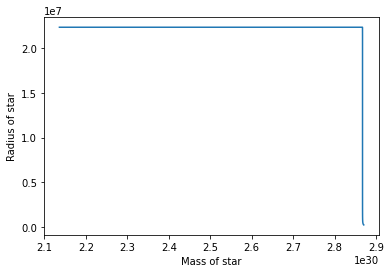

In [3]:
import numpy as np
import matplotlib.pyplot as plt


#Constants
N = 10000
# alpha = 0.5

#Defining Comstants
M_sun = 1.989 * 10**30
rho_0 = 1.962*10**9
R_0 = 2.23*10**6
M_0 = 4*np.pi*rho_0*R_0**3

# m_e = 9.1 * 10**(-31)
# c = 3 * 10**8
# h_cross = 1.054 * 10**(-34)
# G = 6.67*10**(-11)
# m_N = 1.69 * 10**(-27)
# n_0 = (m_e**3)*(c**3)/(3*np.pi**2 * h_cross**3)
# k = 1/4*((3*np.pi**2)**(1/3))*(h_cross*c)*(alpha/m_N)**(4/3)


# defining Functions
def mass_grad(M_cap, r_cap, rho_cap):
  return(r_cap**2)*rho_cap

def dens_grad(M_cap, r_cap, rho_cap):
  return -1*(M_cap*rho_cap**(2/3))/r_cap**2


r_cap=np.linspace(0.001, 10 + 0.001, N)

M_cap=np.zeros(N)
M_cap[0] = 0
rho_cap = np.zeros(N)

dr = r_cap[1] - r_cap[0]

k = 50

#Creating Array with values of rho_c so to loop and plot the graph
rho_c = np.logspace(-1, 6, k, endpoint=True, base=10)

r_max = np.zeros(k)
m_max = np.zeros(k)

for j in range(0, k):
    
  rho_cap[0] = rho_c[j]
  
  for i in range(1,N):

    #Solving the DE with Runge Kutta 2nd Error
    d_1 = dr*dens_grad(M_cap[i-1], r_cap[i-1], rho_cap[i-1])
    m_1 = dr*mass_grad(M_cap[i-1], r_cap[i-1], rho_cap[i-1])
    d_2 = dr*dens_grad(M_cap[i-1] + m_1/2, r_cap[i-1] + dr/2, rho_cap[i-1] + d_1/2)  
    m_2 = dr*mass_grad(M_cap[i-1] + m_1/2, r_cap[i-1] + dr/2, rho_cap[i-1] + d_1/2)

    M_cap[i] = M_cap[i-1] + m_2
    rho_cap[i] = rho_cap[i-1] + d_2



  M_cap[np.isnan(M_cap)] = 0

  for m in range(len(M_cap)):
    if M_cap[m] == np.max(M_cap):
      r_max[j] = r_cap[m]
      m_max[j] = M_cap[m]
      break

  
plt.plot(m_max*M_0, r_max*R_0)
plt.ylabel("Radius of star")
plt.xlabel("Mass of star")
print(f'''Chandrasekhar Mass Limit is : {m_max[k-1]*M_0/M_sun}''')
